In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [3]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv') # Reads the file

In [4]:
df.shape # Prints the shape of 'df'

(284807, 31)

In [5]:
df = df.sample(frac=0.1) # Size is reduced to 1/10th of previous size because of computational constraint

In [7]:
df.shape

(28481, 31)

In [8]:
df.columns # Prints columns of data frame 'df'

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
df.nunique() # Prints total number of unique elements in each column

Time      25667
V1        28264
V2        28264
V3        28264
V4        28264
V5        28264
V6        28264
V7        28264
V8        28264
V9        28264
V10       28264
V11       28264
V12       28264
V13       28264
V14       28264
V15       28264
V16       28264
V17       28264
V18       28264
V19       28264
V20       28264
V21       28264
V22       28264
V23       28264
V24       28264
V25       28264
V26       28264
V27       28264
V28       28264
Amount     8806
Class         2
dtype: int64

In [10]:
df[df['Class'] == 1]['Class'].count() # Prints total number of fraudulent transactions

51

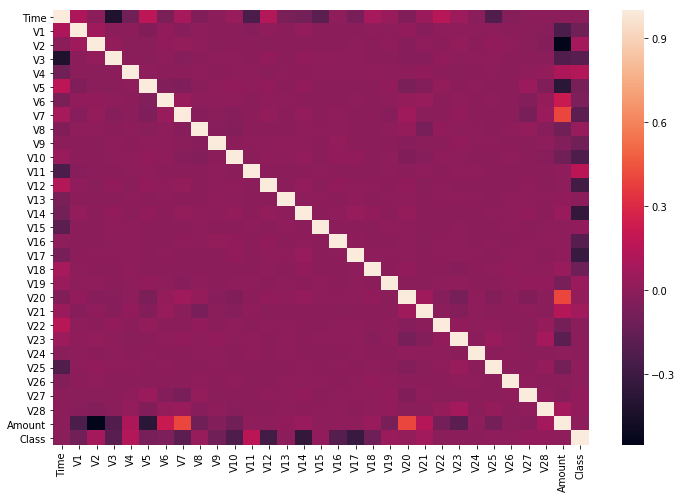

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr()) # Heatmap of correlation between columns of 'df'.

In [13]:
fraud = df[df['Class'] == 1] # Number of fraudulent transactions
valid = df[df['Class'] == 0] # Number of valid transactions
outlier_fraction = len(fraud)/float(len(valid))
print(outlier_fraction)


0.0017938797045374604


In [17]:
X = df.drop('Class',axis = 1) # X is input
y = df['Class'] # y is output

In [18]:
a = LocalOutlierFactor(n_neighbors = 20,contamination = outlier_fraction)
y_prediction1 = a.fit_predict(X) # Fitting the model.
y_prediction1[y_prediction1 == 1] = 0 # Valid transactions are labelled as 0.
y_prediction1[y_prediction1 == -1] = 1 # Fraudulent transactions are labelled as 1.
errors1 = (y_prediction1 != y).sum() # Total number of errors is calculated.
print(errors1)
print(accuracy_score(y_prediction1,y))
print(classification_report(y_prediction1,y))

103
0.9963835539482462
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28429
           1       0.00      0.00      0.00        52

    accuracy                           1.00     28481
   macro avg       0.50      0.50      0.50     28481
weighted avg       1.00      1.00      1.00     28481



In [19]:
b = IsolationForest(max_samples = len(X),contamination = outlier_fraction).fit(X) # Fitting the model.
y_prediction2 = b.predict(X) # Prediction using trained model.
y_prediction2[y_prediction2 == 1] = 0 # Valid transactions are labelled as 0.
y_prediction2[y_prediction2 == -1] = 1 # Fraudulent transactions are labelled as 1.
errors2 = (y_prediction2 != y).sum() # Total number of errors is calculated.
print(errors2)
print(accuracy_score(y_prediction2,y))
print(classification_report(y_prediction2,y))

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


73
0.9974368877497279
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28429
           1       0.29      0.29      0.29        52

    accuracy                           1.00     28481
   macro avg       0.65      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481



In [20]:
# f1 score of Isolation Forest model was better than Local Outlier Factor model.